<a href="https://colab.research.google.com/github/PrithaJaipal/Introductory-CV/blob/main/RANSAC_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

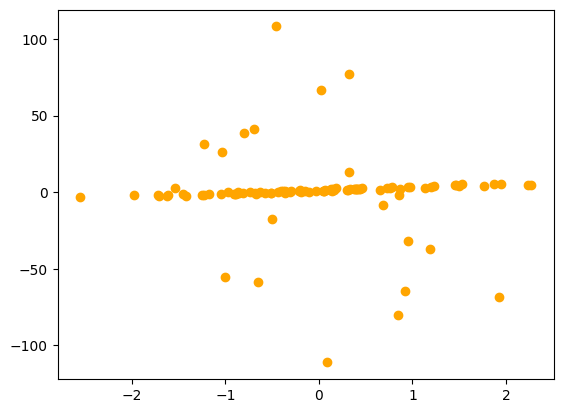

In [9]:
#data generation
np.random.seed(0)
n_samples = 100
n_outliers = 20

#inliers
x_inliers = np.random.normal(0, 1, size=(n_samples - n_outliers, 1))
y_inliers = 2 * x_inliers.squeeze() + 1 + np.random.normal(0, 0.5, size=n_samples - n_outliers)

#outliers
x_outliers = np.random.normal(0, 1, size=(n_outliers, 1))
y_outliers = np.random.normal(0, 50, size=n_outliers)

#combined data
x_data = np.vstack([x_inliers, x_outliers])
y_data = np.concatenate([y_inliers, y_outliers])

#plot
plt.scatter(x_data, y_data, color='orange', label='Data points')


In [55]:
def ransac(x_data, y_data, n_iterations = 100, threshold = 10):
    best_inliers = []
    best_model = None
    for _ in range(n_iterations):
      #random sampling
      sample_indices = np.random.choice(len(x_data), 2, replace=False)
      x_sample = x_data[sample_indices]
      y_sample = y_data[sample_indices]
      A = np.vstack([x_sample.squeeze(), np.ones(len(x_sample))]).T
      model, _, _, _ = np.linalg.lstsq(A, y_sample, rcond=None)
      #consensus
      distances = np.abs(model[0] * x_data.squeeze() + model[1] - y_data)
      inliers = distances < threshold
      if np.sum(inliers) > len(best_inliers):
        best_inliers = inliers
        best_model = model
    return best_model, best_inliers

In [56]:
model, inliers = ransac(x_data, y_data)

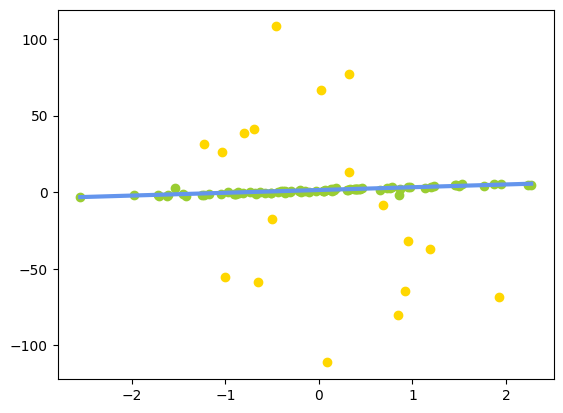

In [57]:
# Plot results
plt.scatter(x_data[inliers], y_data[inliers], color='yellowgreen', label='Inliers')
plt.scatter(x_data[~inliers], y_data[~inliers], color='gold', label='Outliers')
line_x = np.linspace(x_data.min(), x_data.max(), 100)
line_y_ransac = model[0] * line_x + model[1]
plt.plot(line_x, line_y_ransac, color='cornflowerblue', linewidth=3, label='Best fit line')
#plt.legend(loc='upper right')
plt.show()